<a href="https://colab.research.google.com/github/GabrielCdev/HELP_International_Analysis/blob/main/HELP_International_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

##HELP International
"A HELP International é uma ONG humanitária internacional que está empenhada em combater a pobreza e fornecer às pessoas de países atrasados ​​serviços básicos e alívio durante o período de desastres e calamidades naturais."

Base para a atividade: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:
Realizar EDA, pré-processamento, agrupar utilizando as técnicas de agrupamento apresentadas na disciplina, analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional.


#Importação das bibliotecas necessárias

In [42]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de Machine Learning
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#Importação dos dados

In [2]:
# Importação do dataset
help_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/HELP_International_Analysis/main/dataset/Country-data.csv')

#Visualização dos dados

In [3]:
help_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
help_df.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#Identificação das variáveis

- country: Nome do país;
- child_mort: Morte de crianças menores de 5 anos por 1000 nascidos vivos;
- exports: Exportações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- health: Gasto total com saúde per capita. Dado como % de idade do PIB per capita;
- imports: Importações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- income: Renda líquida por pessoa;
- inflation: A medição da taxa de crescimento anual do PIB Total;
- life_expec: O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade permanecessem os mesmos;
- total_fer: O número de filhos que nasceriam de cada mulher se as taxas atuais de fecundidade por idade permanecessem as mesmas;
- gdpp: O PIB per capita. Calculado como o PIB total dividido pela população total.

#Análise exploratória

##Verificação de dados duplicados

In [6]:
help_df.duplicated().sum()

0

##Verificação de dados nulos

In [7]:
help_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##Distribuição dos dados

In [8]:
help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##Alteração do index

In [9]:
help_df.set_index('country', inplace=True)

##Análise univariada

###Visualização da frequência de cada atributo quantitativo

In [10]:
help_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

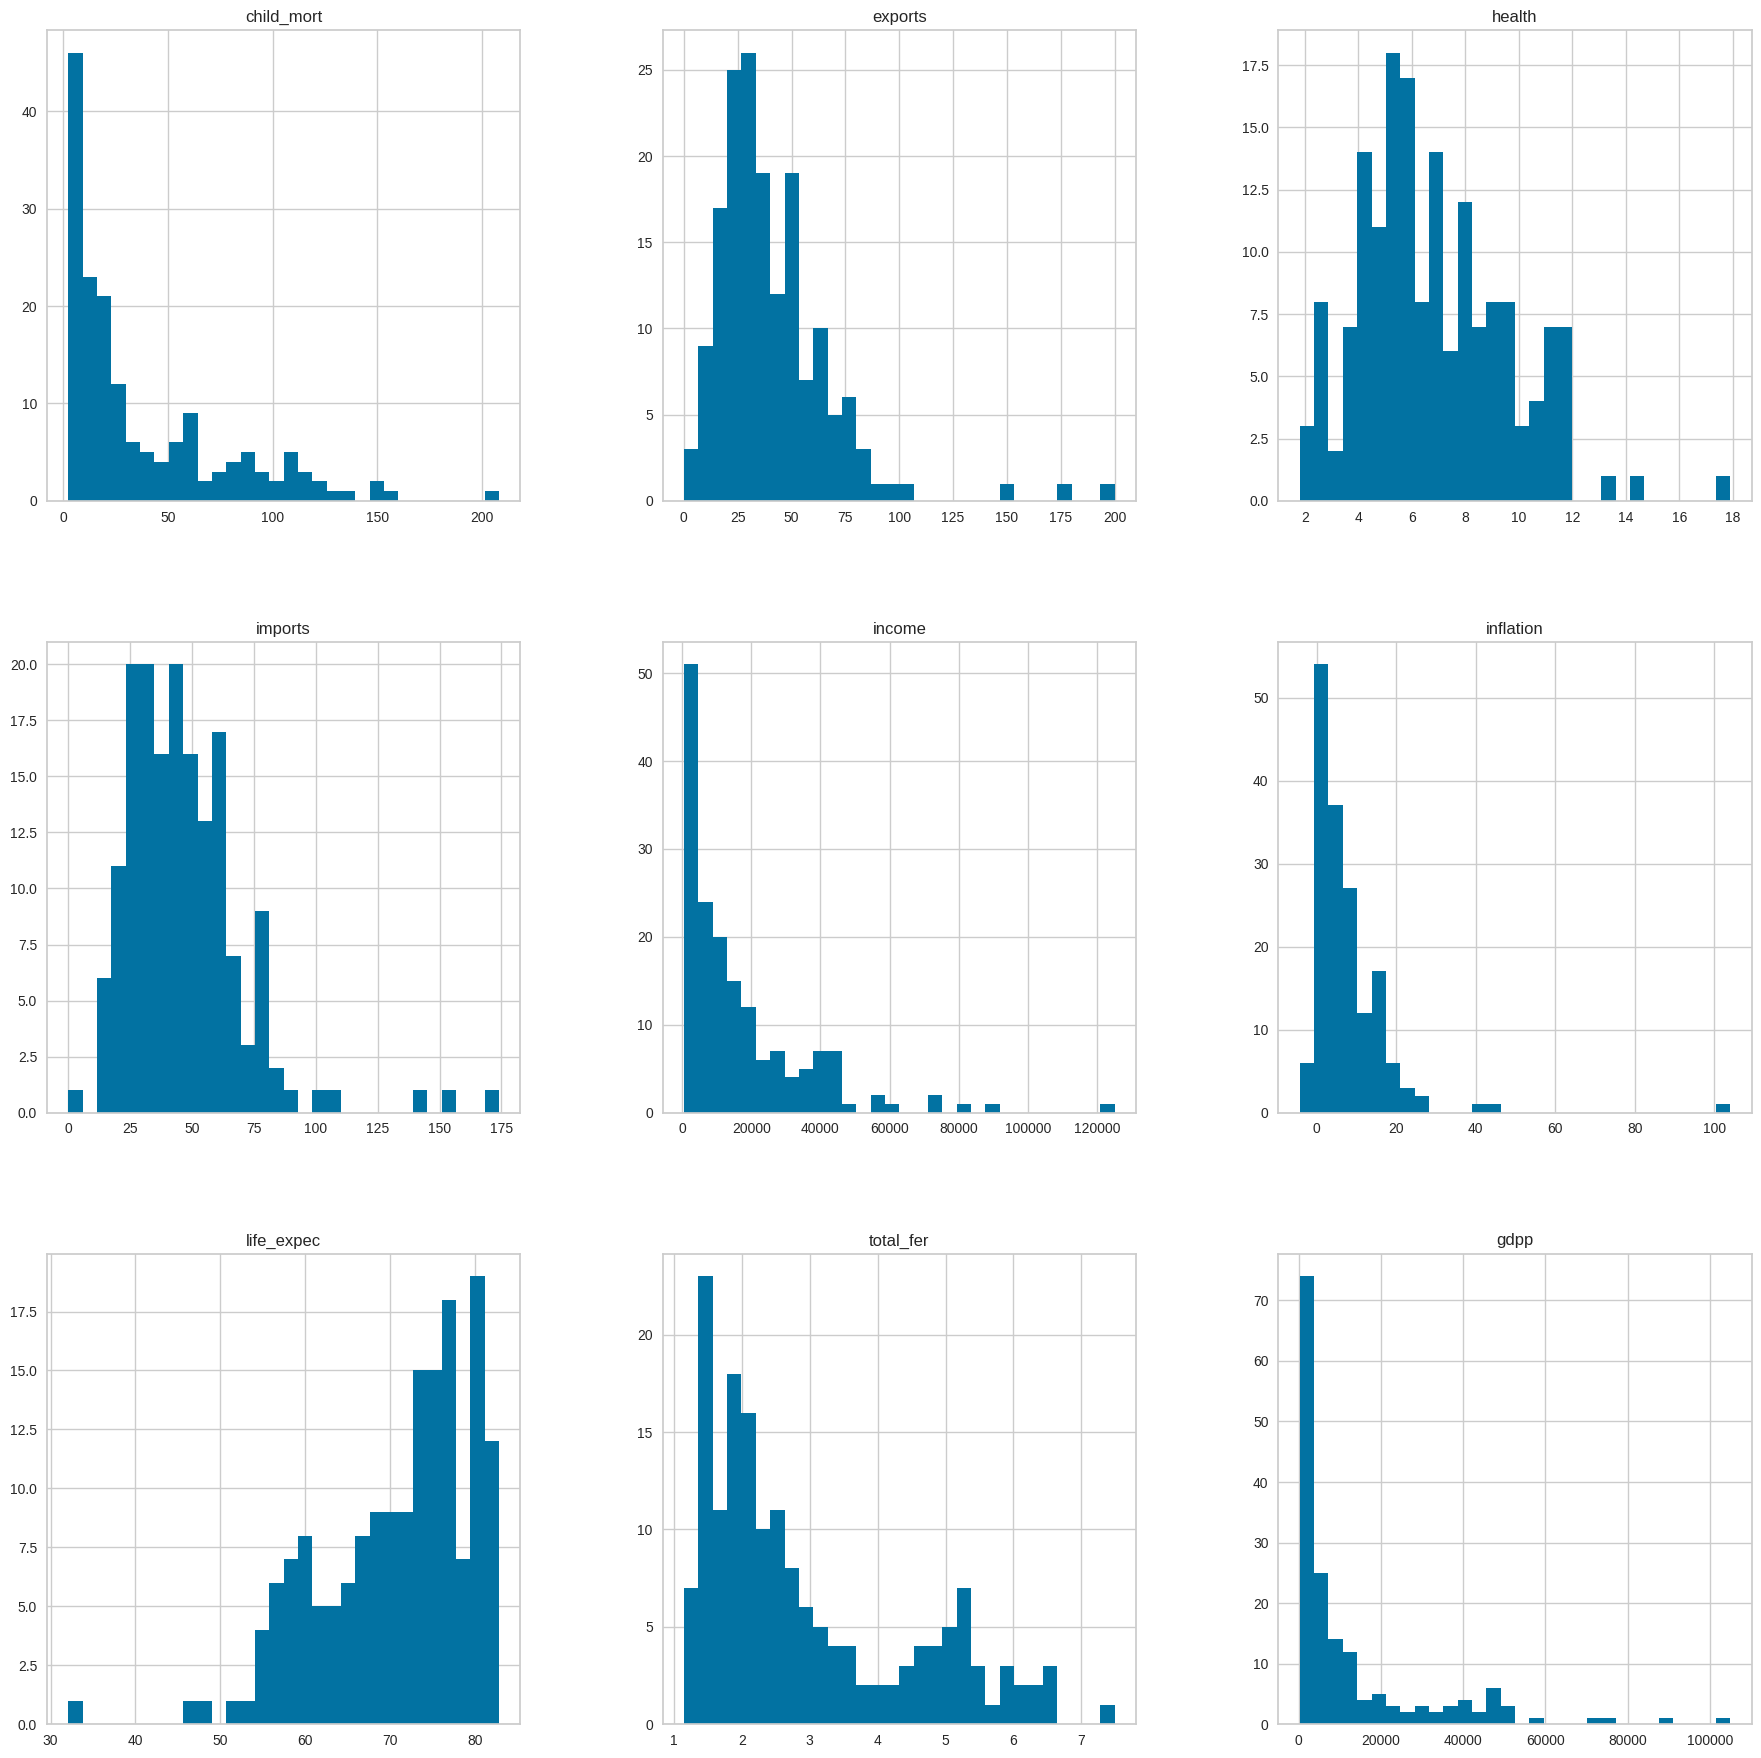

In [11]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
            'life_expec', 'total_fer', 'gdpp']
help_df[features].hist(figsize=(22, 22), bins=30);

In [12]:
help_df[help_df['child_mort'] > 150].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
160.0       16.8     13.10   34.5     1220    17.20      55.0        5.20       399     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

In [13]:
help_df[help_df['life_expec'] < 50].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
99.7        39.4     11.10   101.0    2380    4.15       46.5        3.30       1170    1
149.0       11.8     3.98    26.5     888     2.01       47.5        5.21       446     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

Com os histogramas, podemos extrair as seguintes informações:

- 30% dos países neste dataset possui alta taxa de mortalidade infantil (> 50)
>  ref: https://tabnet.datasus.gov.br/cgi/idb2000/fqc01.htm
- Mais de 95% dos países tem investimentos menores que 12% em saúde;
- Apenas 8 países (apróx.: 5%) possuem renda líquida e PIB per capta superior a 50.000;
- Apenas 1 país possui inflação acima de 50 pontos;
- Cerca de 4% dos países possuem expectativa de vida abaixo de 55 anos;
- A maior parte dos países concentra-se numa taxa de fecundidade de 1 a 6 filhos.

##Análise multivariada

<Axes: >

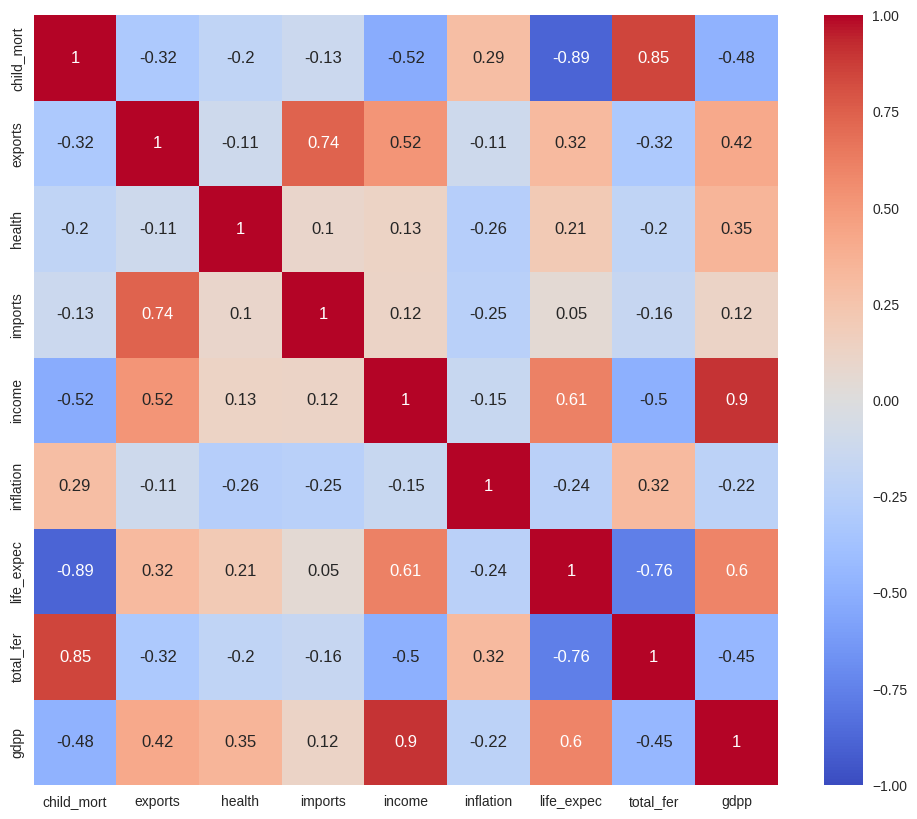

In [14]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

A partir deste heatmap, é possível observar que as colunas:
- total_fer e child_mort possuem uma forte correlação positiva (cerca de 85%);
- life_expec e child_mort possuem uma forte correlação negativa (cerca de -89%);
- gdpp e income possuem uma forte correlação positiva (cerca de 90%).

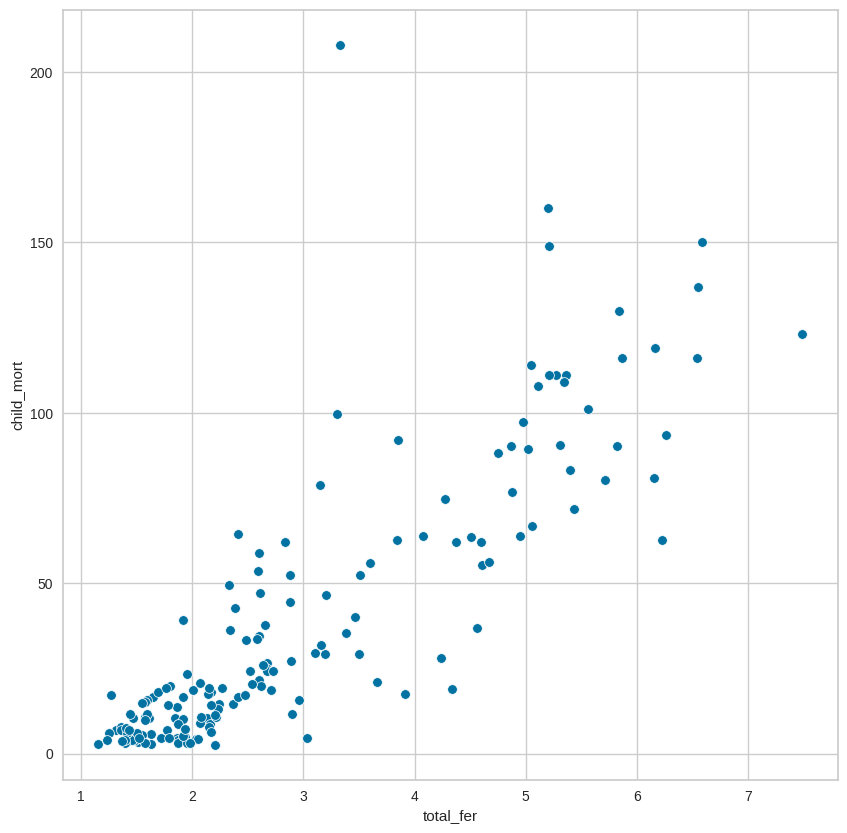

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='total_fer', y='child_mort')
plt.show()

A partir desta análise podemos inferir que quanto menor a mortalidade de crianças, menor o número de filhos que nasceriam de cada mulher. Em outras palavras, mulheres que tendem a ter um menor número de filhos (1 a 3, pelo menos), tem menores chances de mortes destes filhos.

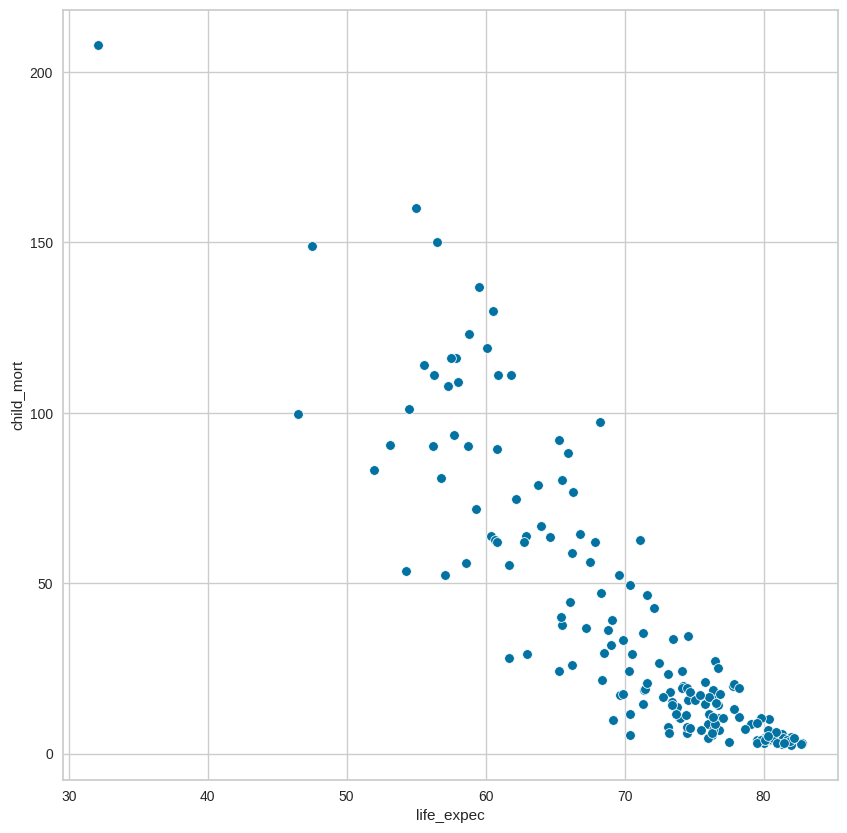

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='life_expec', y='child_mort')
plt.show()

A partir desta análise podemos inferir que a maior expectativa de vida está atrelada ao menor número de morte de crianças. E, quanto menor essa expectativa, maior o número de morte de crianças.

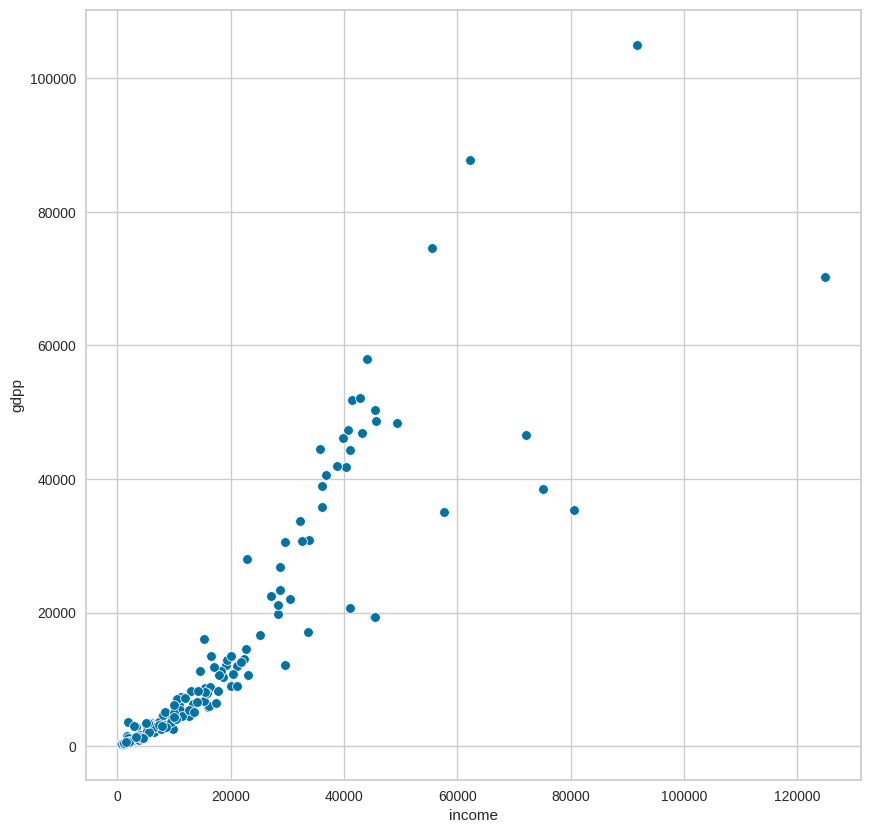

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='income', y='gdpp')
plt.show()

A partir deste gráfico é possível inferir que quando maior a renda líquida por pessoa, maior o PIB per capita dos países.

#Remoção de dados

In [18]:
help_df.drop(columns=['total_fer', 'income', 'exports', 'imports'], inplace=True)

Pela grande correlação de dados, as colunas total_fer e income foram removidas. As colunas exports e imports também foram removidas, pois não contemplam informações para o nosso objetivo final.

##Correlação após a remoção de colunas

<Axes: >

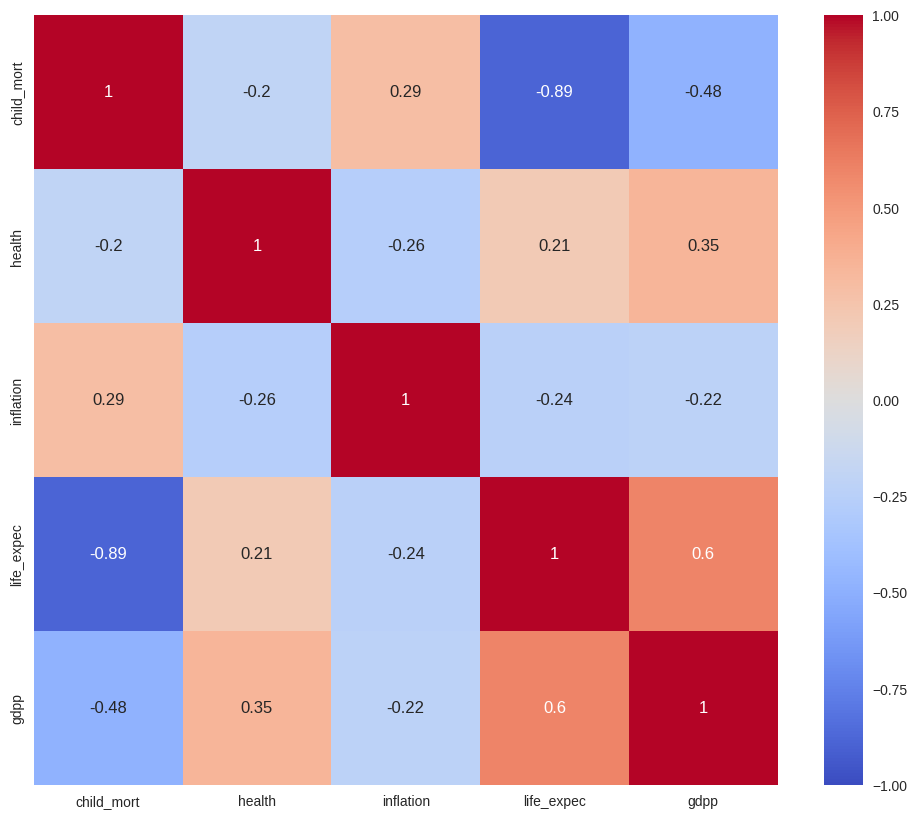

In [19]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

##Distribuição dos dados após a remoção das colunas

In [20]:
help_df.describe()

,child_mort,health,inflation,life_expec,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,7.781832,70.555689,12964.155689
std,40.328931,2.746837,10.570704,8.893172,18328.704809
min,2.600000,1.810000,-4.210000,32.100000,231.000000
25%,8.250000,4.920000,1.810000,65.300000,1330.000000
50%,19.300000,6.320000,5.390000,73.100000,4660.000000
75%,62.100000,8.600000,10.750000,76.800000,14050.000000
max,208.000000,17.900000,104.000000,82.800000,105000.000000


#Análises específicas

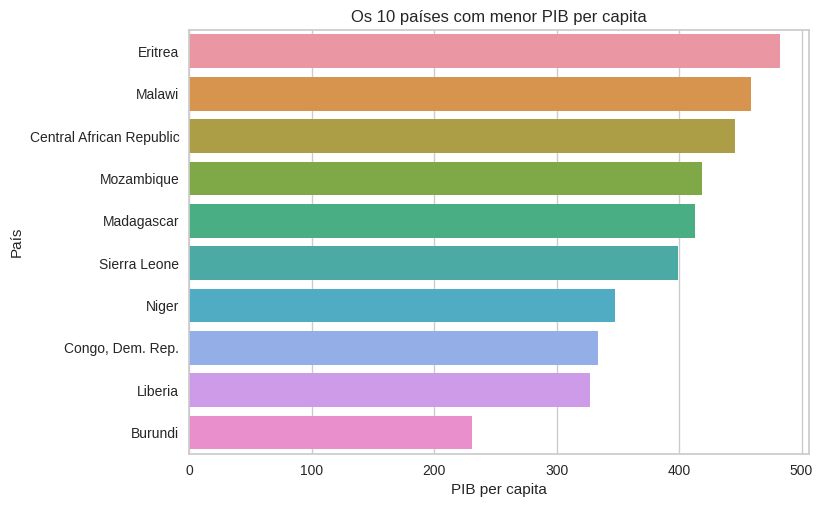

In [21]:
df_sorted = help_df.sort_values(by='gdpp', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='gdpp', y=top_10.index, data=top_10)

plt.xlabel('PIB per capita')
plt.ylabel('País')
plt.title('Os 10 países com menor PIB per capita')

plt.show()

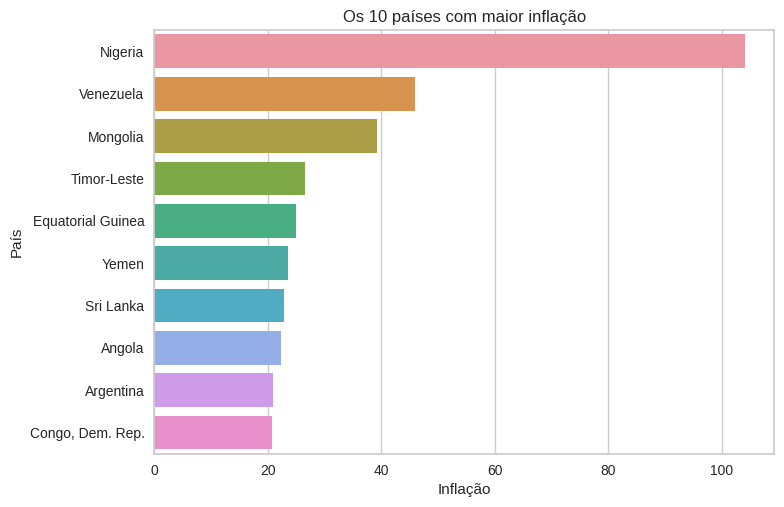

In [22]:
df_sorted = help_df.sort_values(by='inflation', ascending=False)
top_10 = df_sorted.head(10)

sns.barplot(x='inflation', y=top_10.index, data=top_10)

plt.xlabel('Inflação')
plt.ylabel('País')
plt.title('Os 10 países com maior inflação')

plt.show()

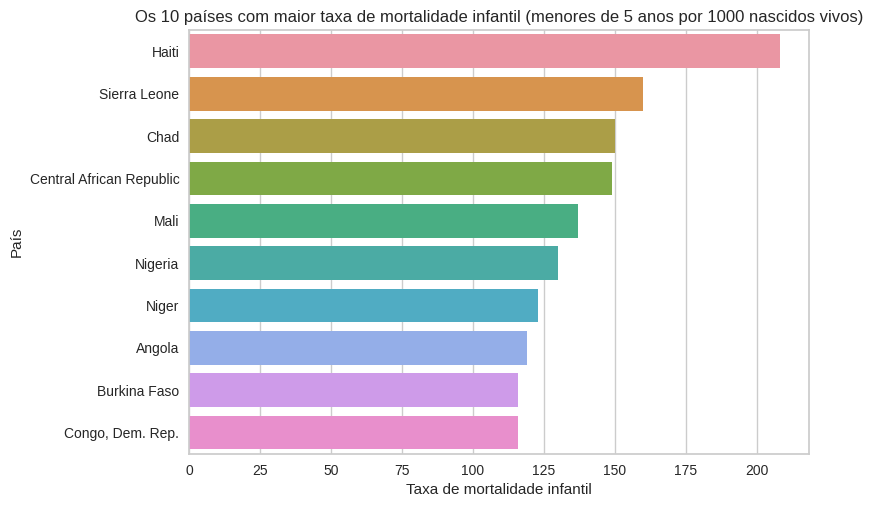

In [23]:
df_sorted = help_df.sort_values(by='child_mort', ascending=False)
top_10 = df_sorted.head(10)

sns.barplot(x='child_mort', y=top_10.index, data=top_10)

plt.xlabel('Taxa de mortalidade infantil')
plt.ylabel('País')
plt.title('Os 10 países com maior taxa de mortalidade infantil (menores de 5 anos por 1000 nascidos vivos)')

plt.show()

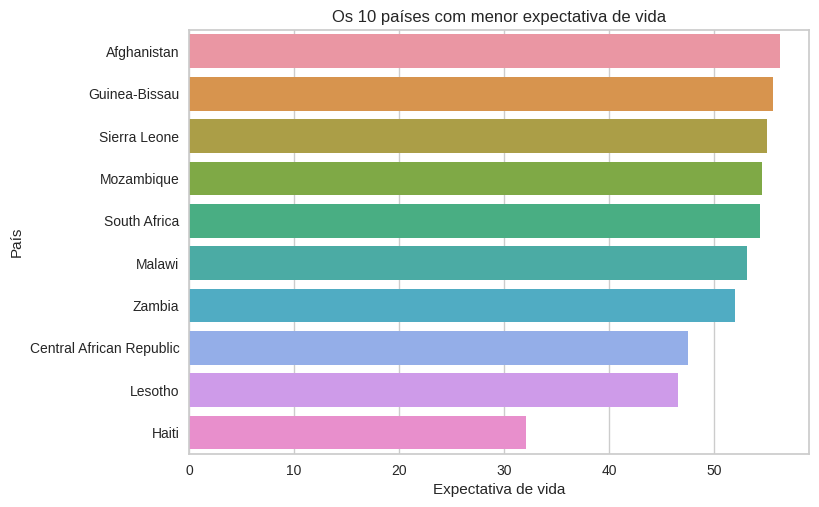

In [24]:
df_sorted = help_df.sort_values(by='life_expec', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='life_expec', y=top_10.index, data=top_10)

plt.xlabel('Expectativa de vida')
plt.ylabel('País')
plt.title('Os 10 países com menor expectativa de vida')

plt.show()

#Backup do dataset

In [25]:
backup = help_df.copy()

In [26]:
help_df

,child_mort,health,inflation,life_expec,gdpp
country,,,,,
Afghanistan,90.2,7.58,9.44,56.2,553
Albania,16.6,6.55,4.49,76.3,4090
Algeria,27.3,4.17,16.10,76.5,4460
Angola,119.0,2.85,22.40,60.1,3530
Antigua and Barbuda,10.3,6.03,1.44,76.8,12200
...,...,...,...,...,...
Vanuatu,29.2,5.25,2.62,63.0,2970
Venezuela,17.1,4.91,45.90,75.4,13500
Vietnam,23.3,6.84,12.10,73.1,1310


#Aplicação dos algoritmos de Machine Learning

##Normalização dos dados + Análise da silhueta

In [27]:
def silhueta(X, y_km):
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]

  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals, 
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--") 
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()

In [28]:
X = StandardScaler().fit_transform(help_df)
X = pd.DataFrame(X, columns = help_df.columns)
X

,child_mort,health,inflation,life_expec,gdpp
0,1.291532,0.279088,0.157336,-1.619092,-0.679180
1,-0.538949,-0.097016,-0.312347,0.647866,-0.485623
2,-0.272833,-0.966073,0.789274,0.670423,-0.465376
3,2.007808,-1.448071,1.387054,-1.179234,-0.516268
4,-0.695634,-0.286894,-0.601749,0.704258,-0.041817
...,...,...,...,...,...
162,-0.225578,-0.571711,-0.489784,-0.852161,-0.546913
163,-0.526514,-0.695862,3.616865,0.546361,0.029323
164,-0.372315,0.008877,0.409732,0.286958,-0.637754
165,0.448417,-0.597272,1.500916,-0.344633,-0.637754


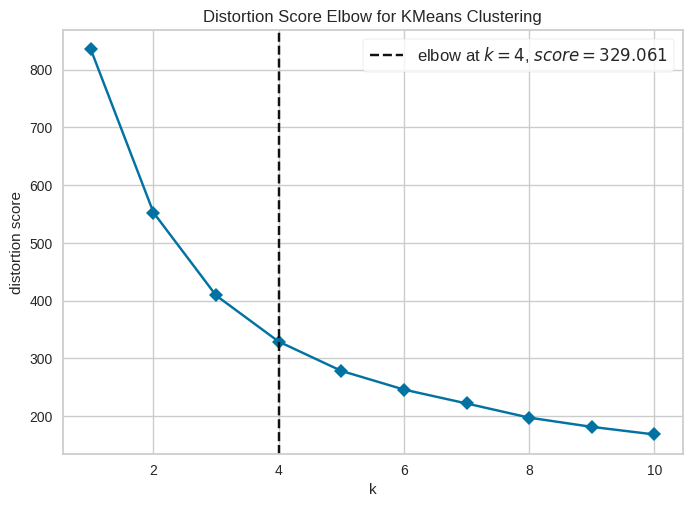

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans(init='k-means++', n_init=10, random_state=3)

visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.poof()

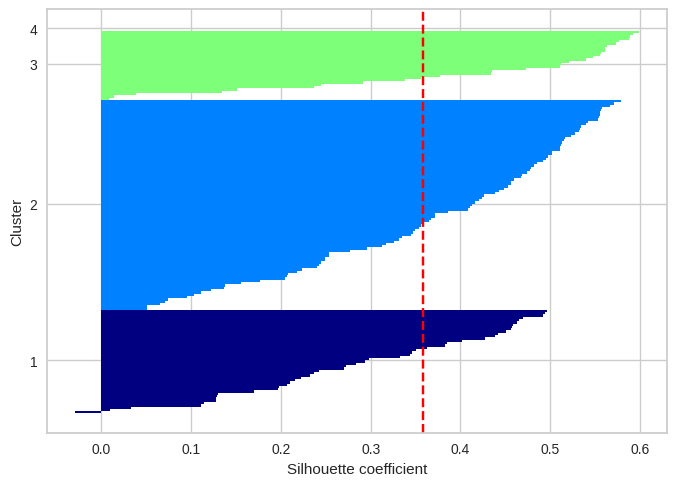

In [32]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=4)
y_km = km.fit_predict(X)
silhueta(X, y_km)

##PCA - Principal Component Analysis

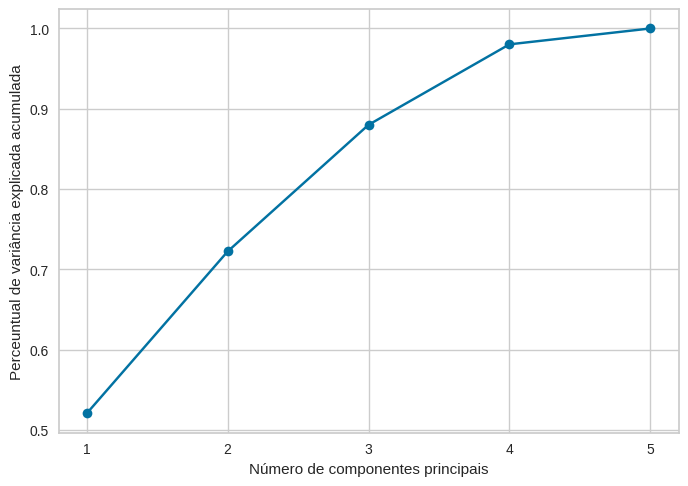

In [34]:
pca = PCA()
pca.fit(X)

variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Perceuntual de variância explicada acumulada")
ax.set_xticks(eixo_x)
plt.show()

###Criação do novo dataset

In [35]:
pca = PCA(n_components=3)
X2 = pca.fit_transform(X)

###Visualização do novo dataset

In [36]:
pd.DataFrame(X2)

,0,1,2
0,1.890742,-1.071631,0.253129
1,-0.486002,0.297017,-0.549920
2,0.210117,1.422634,-0.111261
3,2.815822,0.716176,0.449384
4,-0.842656,0.336694,-0.741306
...,...,...,...
162,0.636389,-0.083843,-0.876237
163,0.656178,2.810460,2.336135
164,0.058566,0.441248,0.038659
165,1.350397,0.976350,0.693401


###Análise do agrupamento com novos dados

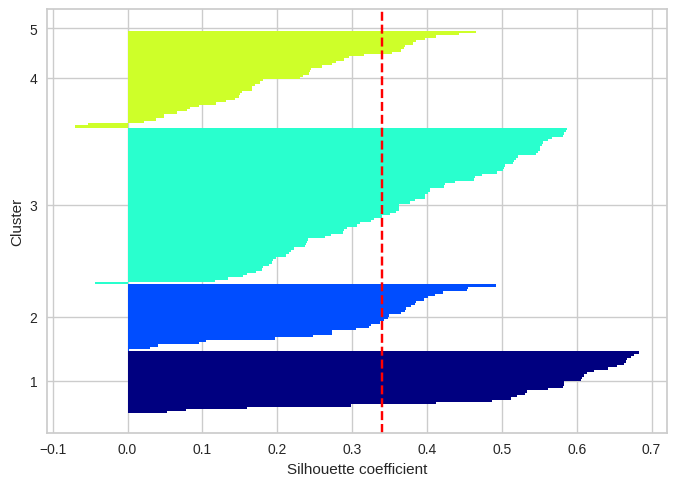

In [37]:
y_km2 = km.fit_predict(X2)
silhueta(X2, y_km2)

###Visualização da partição

<Axes: >

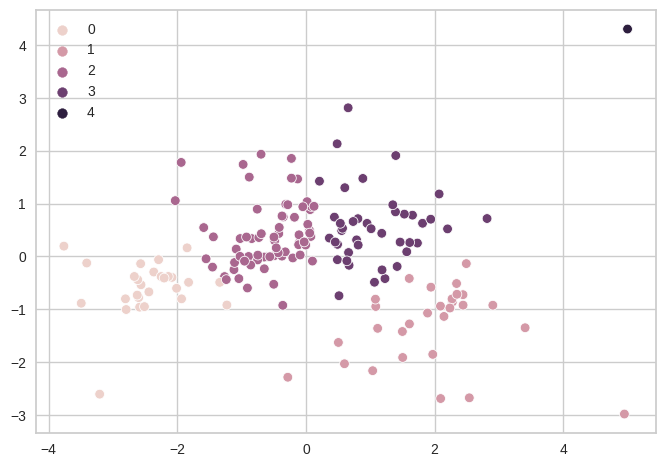

In [38]:
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y_km2)

##Hierarchical Clustering

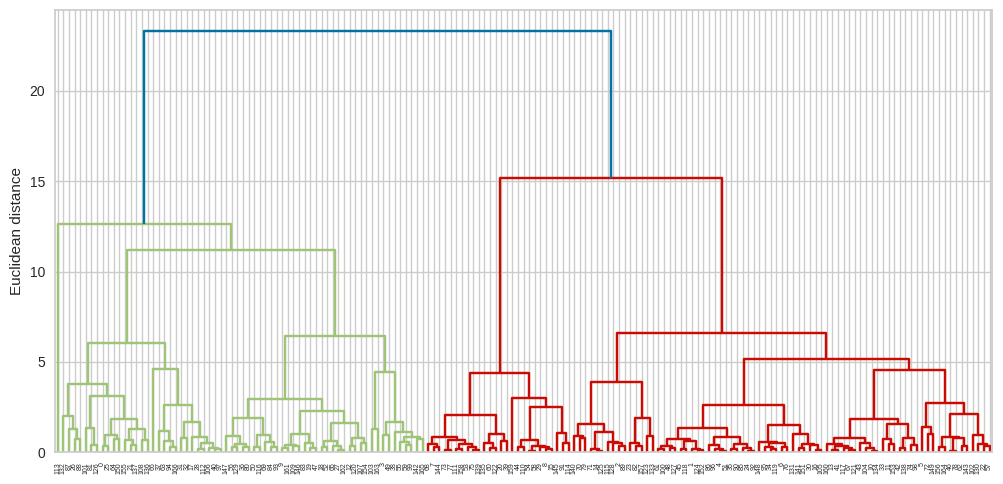

In [39]:
cluster = linkage(X2, method='ward', metric='euclidean')

plt.figure(figsize=(10, 5))
row_dendr = dendrogram(cluster)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [40]:
def plot_hclust(data, y_hc):
  plt.figure(figsize=(10, 10))
  plt.scatter(
      data[y_hc == 0, 0], data[y_hc == 0, 1],
      s=50, c='lightgreen',
      marker='s', edgecolor='black',
      label='cluster 1'
  )
  plt.scatter(
      data[y_hc == 1, 0], data[y_hc == 1, 1],
      s=50, c='orange',
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()

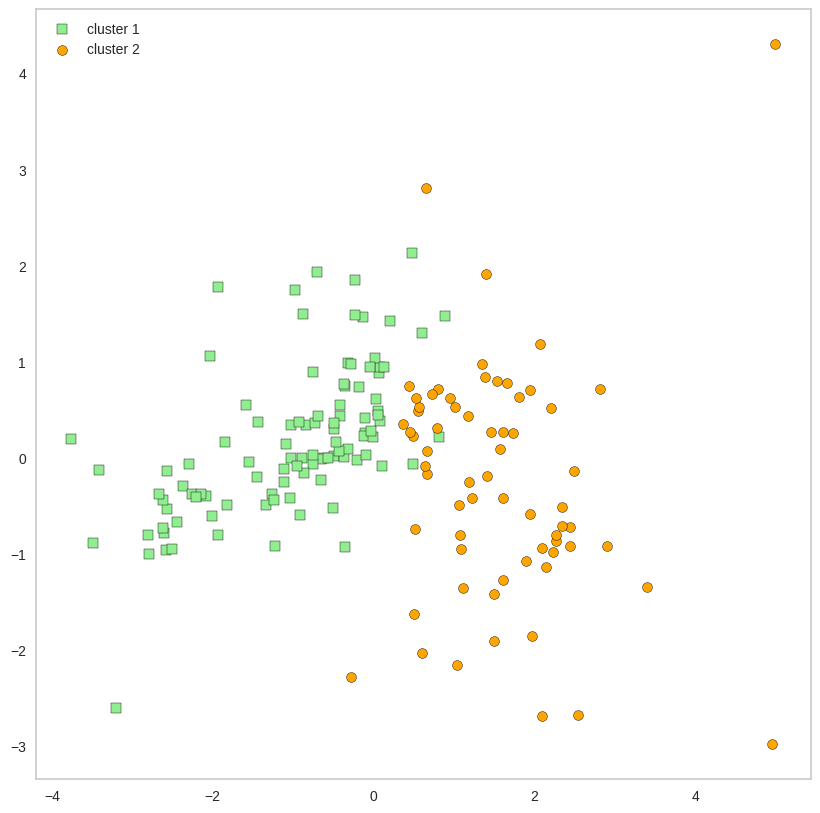

In [41]:
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = ac.fit_predict(X2)
plot_hclust(X2, labels)

##DBSCAN